## 3.2.2. 계단 함수 구현하기

In [1]:
#계단 함수 구현
import numpy as np

#인수로 실수만 가능한 경우
def step_function(x);
    if x>0:
        return 1
    else:
        return 0
    
#인수로 배열도 가능한 경우    
def step_function(x):
    y = x>0  
    return y.astype(np.int)

step_function(np.array([-1.0, 1.0, 2.0]))   #array([0, 1, 1])

array([0, 1, 1])

## 3.2.3. 계단 함수의 그래프

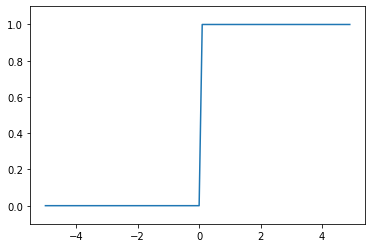

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
plt.plot(x, y1)
plt.ylim(-0.1, 1.1)   #y축의 범위 지정
plt.show()

## 3.2.4. 시그모이드 함수 구현하기

In [81]:
#시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)   #array([0.26894142, 0.73105858, 0.88079708])

array([0.26894142, 0.73105858, 0.88079708])

In [61]:
#브로드캐스트 복습
#스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘파이 배열로 출력됐다. 
t = np.array([1.0, 2.0, 3.0])
print(1.0+t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


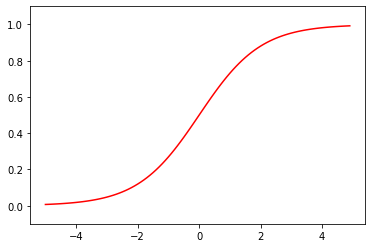

In [70]:
#시그모이드 함수 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)
plt.plot(x, y2, 'r')
plt.ylim(-0.1, 1.1)   #y축 범위 지정
plt.show()

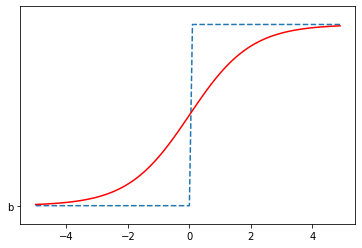

In [72]:
#계단 함수와 시그모이드 함수
plt.plot(x, y1, '--', 'b')
plt.plot(x, y2, 'r')
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.7. ReLU 함수

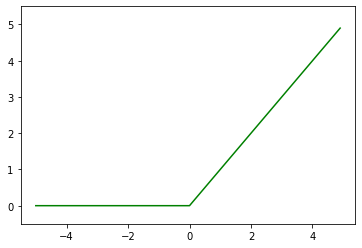

In [79]:
#ReLU 함수
def relu(x):
#     if x <= 0:
#        return 0
#     return x
    return np.maximum(0,x) #maximum 은 두 입력 중 큰 값을 선택해 반환하는 함수이다.
plt.plot(x, relu(x), 'g')
plt.ylim(-0.5, 5.5)
plt.show()

## 3.3.1. 다차원 배열

In [ ]:
#1차원 배열
A = np.array([1, 2, 3, 4])
print(A)   #[1 2 3 4]
print(np.ndim(A))   #1
print(A.shape)   #(4, )
print(A.shape[0])   #4

In [13]:
#2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)   #[[1 2]
           # [3 4]
           # [5 6]]
print(np.ndim(B))   #2
print(B.shape)   #(3, 2)
print(B.shape[0])   #3


[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [14]:
#3차원 배열 
C = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
print(C)   #[[[ 1  2  3]
           #  [ 4  5  6]]
            
           # [[ 7  8  9]
           #  [10 11 12]]]
print(np.ndim(C))   #3
print(C.shape)   #(2, 2, 3)
print(C.shape[0])   #2

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
3
(2, 2, 3)
2


## 3.3.2. 행렬의 곱

In [16]:
#2차원 배열 간의 곱
A = np.array([[1,2], [3,4]])
print(A.shape)   #(2, 2)
B = np.array([[5,6], [7,8]])
print(B.shape)   #(2,2)
print(np.dot(A,B))   #[[19 22]
                     # [43 50]]

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [24]:
#2X3 행렬과 3X2 행렬의 곱
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)   #(2, 3)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)   #(3, 2)
print(np.dot(A,B))   #[[22 28]
                     # [49 64]]
C = np.dot(A,B)
print(C.shape)   #(2, 2)

(2, 3)
(3, 2)
[[22 28]
 [49 64]]
(2, 2)


## 3.3.3. 신경망에서의 행렬 곱

In [27]:
#간단한 신경망을 가정해볼건데, 이 신경망은 편향과 활성화 함수를 생략하고 가중치만 갖는다.
#다차원 배열의 스칼라곱을 구해주는 np.dot 함수를 사용하면 이처럼 단번에 결과 Y를 계산할 수 있다.
X = np.array([1,2])
print(X.shape)   #(2,)
W = np.array([[1,3,5], [2,4,6]])
print(W)   #[[1 3 5]
           # [2 4 6]]
print(W.shape)   #(2, 3)
Y = np.dot(X,W) 
print(Y)   #[5 11 17]
print(Y.shape)   #(3,)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]
(3,)


## 3.4.2. 각 층의 신호 전달 구현하기

In [83]:
#3층 신경망의 1층 '가중치 부분' 구현
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)   #(2, 3)
print(X.shape)   #(2,)
print(B1.shape)   #(3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [85]:
#입력층에서 1층으로의 신호 전달
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
print(A1)   #[0.3 0.7 1.1]
print(Z1)   #[0.57444252 0.66818777 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [86]:
#1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)   #(3,)
print(W2.shape)   #(3, 2)
print(B2.shape)   #(2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [88]:
#2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  #혹은 Y = A3

## 3.4.3. 구현 정리

In [89]:
#3층 신경망 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)   #[0.31682708 0.69627909]

[0.31682708 0.69627909]


## 3.5.1. 항등 함수와 소프트맥스 함수 구현하기

In [92]:
#소프트맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)   #지수 함수
print(exp_a)   #[ 1.34985881 18.17414537 54.59815003]

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)   #74.1221542101633

y = exp_a / sum_exp_a   
print(y)   #[0.01821127 0.24519181 0.73659691]

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [93]:
#위의 논리 흐름을 파이썬 함수로 정의해서 나중에 사용하겠다.
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.2. 소프트맥스 함수 구현 시 주의점

In [99]:
a = np.array([1010, 1000, 990])
print( np.exp(a) / np.sum(np.exp(a)) )   #[nan nan nan]   소프트맥스 함수의 계산이 제대로 되지 않는다.

c = np.max(a)
print(a - c)   #[  0 -10 -20]

print( np.exp(a - c) / np.sum(np.exp(a - c)) )   #[9.99954600e-01 4.53978686e-05 2.06106005e-09]

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


<ipython-input-99-111269e246e9>:2: RuntimeWarning: overflow encountered in exp
  print( np.exp(a) / np.sum(np.exp(a)) )
<ipython-input-99-111269e246e9>:2: RuntimeWarning: invalid value encountered in true_divide
  print( np.exp(a) / np.sum(np.exp(a)) )


In [97]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3. 소프트맥스 함수의 특징

In [100]:
#softmax() 함수를 사용한 신경망 출력
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)   #[0.01821127 0.24519181 0.73659691]
np.sum(y)   #1.0

[0.01821127 0.24519181 0.73659691]


1.0

## 3.6.1. MNIST 데이터셋

In [106]:
import sys, os
sys.path.append(os.pardir)   #부모 디렉터리 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

#처음 한 번은 몇 분 정도 걸린다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)   #(60000, 784)
print(t_train.shape)   #(60000,)
print(x_test.shape)    #(10000, 784)
print(t_test.shape)    #(10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [107]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)   #5

print(img.shape)   #(784,)
img = img.reshape(28, 28)   #원래 이미지 모양으로 변형
print(img.shape)   #(28,28)

img_show(img)

5
(784,)
(28, 28)


## 3.6.2. 신경망의 추론 처리

In [136]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open(r"C:\Users\Kim Taeeun\Desktop\My_Study\밑바닥부터_시작하는_딥러닝\Chapter_3\dataset\sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [137]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))   #Accuracy:0.9352

Accuracy:0.9352


## 3.6.3. 배치 처리

In [138]:
#앞서 구현한 신경망 각 층의 가중치 형상을 출력해보기
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)   #(10000, 784)
print(x[0].shape)   #(784,)
print(W1.shape)   #(784, 50)
print(W2.shape)   #(50, 100)
print(W3.shape)   #(100, 10)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [139]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))   #Accuracy:0.9352

Accuracy:0.9352


In [141]:
# argmax의 예시
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis =1)

print(x.shape)   #(4, 3)
print(y)   #[1 2 1 0]

(4, 3)
[1 2 1 0]


In [142]:
#배치 단위로 분류한 결과를 실제 답과 비교한다.
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)   #[ True  True False  True]
np.sum(y==t)   #3

[ True  True False  True]


3